In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#load txt file data
#data format 
#[-7, -8, -15] = -15 where -7 and -8 are two numbers that are added to get -15(true value of the sum) value after the equal sign is the predicted value
#each line is a new data point
def load_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    data_points = []
    true_values = []
    predicted_values = []

    for line in lines:
        # Remove brackets and split by equals sign
        # print(line)
        numbers, predicted = line.replace('[', '').replace(']', '').split('=')
        
        # Split numbers by comma and convert to integers
        numbers = list(map(int, numbers.split(',')))
        print(numbers)
        
        # Convert predicted value to integer
        predicted=predicted.strip()
        #reove full stop if present
        predicted = predicted.replace('.', '')
        predicted = predicted.replace('?', '')
        predicted = predicted.replace(' ', '')
        predicted = predicted.replace(',', '')
        #chcek predicted value is not a number if not a number then skip the line
        if predicted == '?'or predicted == '':
            continue
        predicted = int(predicted)

        data_points.append(numbers)
        true_values.append(numbers[2])
        predicted_values.append(predicted)

    return data_points, true_values, predicted_values


In [67]:
data_points, true_values, predicted_values = load_data('final_results.txt')

[2, 1, 3]
[4, 4, 8]
[2, 9, 11]
[7, 1, 8]
[2, 4, 6]
[9, 1, 10]
[4, 9, 13]
[4, 8, 12]
[5, 1, 6]
[7, 6, 13]
[3, 4, 7]
[2, 2, 4]
[2, 6, 8]
[5, 1, 6]
[9, 2, 11]
[2, 9, 11]
[6, 4, 10]
[1, 4, 5]
[2, 4, 6]
[7, 5, 12]
[6, 3, 9]
[6, 4, 10]
[2, 3, 5]
[4, 3, 7]
[7, 5, 12]
[4, 6, 10]
[4, 1, 5]
[7, 5, 12]
[4, 6, 10]
[8, 7, 15]
[3, 5, 8]
[4, 9, 13]
[5, 7, 12]
[7, 6, 13]
[3, 9, 12]
[2, 1, 3]
[3, 3, 6]
[2, 7, 9]
[8, 9, 17]
[9, 1, 10]
[9, 5, 14]
[2, 5, 7]
[3, 8, 11]
[5, 9, 14]
[9, 2, 11]
[9, 4, 13]
[6, 3, 9]
[9, 1, 10]
[6, 8, 14]
[2, 6, 8]
[4, 1, 5]
[2, 2, 4]
[2, 9, 11]
[3, 8, 11]
[3, 5, 8]
[7, 4, 11]
[4, 5, 9]
[6, 8, 14]
[8, 2, 10]
[4, 2, 6]
[1, 9, 10]
[4, 1, 5]
[1, 4, 5]
[1, 6, 7]
[9, 4, 13]
[8, 4, 12]
[3, 8, 11]
[8, 7, 15]
[2, 2, 4]
[6, 7, 13]
[8, 1, 9]
[1, 7, 8]
[2, 4, 6]
[4, 9, 13]
[3, 7, 10]
[5, 8, 13]
[2, 8, 10]
[2, 1, 3]
[1, 2, 3]
[3, 7, 10]
[8, 4, 12]
[1, 3, 4]
[1, 7, 8]
[8, 5, 13]
[9, 8, 17]
[4, 5, 9]
[1, 9, 10]
[6, 1, 7]
[8, 9, 17]
[3, 1, 4]
[2, 3, 5]
[2, 4, 6]
[2, 4, 6]
[1, 2, 3]
[9, 6, 15]


In [68]:
#calculate the error
#count wrong predictions
wrong_predictions = 0
for i in range(len(true_values)):
    if true_values[i] != predicted_values[i]:
        print(f'Predicted: {predicted_values[i]}, True: {true_values[i]}')
        wrong_predictions += 1

total_wrong_predictions = wrong_predictions

print(f'Number of wrong predictions: {wrong_predictions}/{len(true_values)}')

Predicted: 5, True: -5
Predicted: 9, True: -3
Predicted: 8, True: -2
Predicted: 5, True: -5
Predicted: 0, True: -4
Predicted: 8, True: -2
Predicted: 0, True: -2
Predicted: 0, True: -4
Predicted: 3, True: -1
Predicted: 4, True: -6
Predicted: 7, True: -3
Predicted: 9, True: -1
Predicted: 2, True: -2
Predicted: 6, True: -4
Predicted: 3, True: -3
Predicted: 9, True: -1
Predicted: 8, True: -2
Predicted: 0, True: -1
Predicted: 8, True: -2
Predicted: 9, True: -1
Predicted: 9, True: -1
Predicted: 9, True: -1
Predicted: 8, True: -2
Predicted: 4, True: -4
Predicted: 1, True: -3
Predicted: 0, True: -2
Predicted: 6, True: -4
Predicted: 1, True: -3
Predicted: 0, True: -1
Predicted: 5, True: -5
Predicted: 4, True: -4
Predicted: 9, True: -1
Predicted: 9, True: -1
Predicted: 1, True: -1
Predicted: 1, True: -1
Predicted: 3, True: -3
Predicted: 1, True: -1
Predicted: 8, True: -2
Predicted: 6, True: -4
Predicted: 8, True: -2
Predicted: 4, True: -6
Predicted: 7, True: 3
Predicted: 0, True: -8
Predicted: 2

In [69]:
#plot for possitive values of data points 

#convert data points to numpy array
data_points = np.array(data_points)

#positive data points are the ones where 1st and 2nd number are positive
positive_data_points = data_points[(data_points[:, 0] > 0) & (data_points[:, 1] > 0)]
positive_true_values = np.array(true_values)[(data_points[:, 0] > 0) & (data_points[:, 1] > 0)]
positive_predicted_values = np.array(predicted_values)[(data_points[:, 0] > 0) & (data_points[:, 1] > 0)]

#acalculate the error
#count wrong predictions
wrong_predictions = 0
for i in range(len(positive_true_values)):
    if positive_true_values[i] != positive_predicted_values[i]:
        print(f'Predicted: {positive_predicted_values[i]}, True: {positive_true_values[i]}')
        wrong_predictions += 1

positive_wrong_predictions = wrong_predictions
print(f'Number of wrong predictions: {wrong_predictions}/{len(positive_true_values)}')

Predicted: 49, True: 39
Predicted: 99, True: 100
Predicted: 108, True: 110
Predicted: 70, True: 80
Predicted: 975, True: 1005
Predicted: 403, True: 503
Predicted: 1563, True: 1613
Predicted: 888, True: 858
Predicted: 1017, True: 1117
Predicted: 1209, True: 1210
Predicted: 1498, True: 1508
Predicted: 842, True: 912
Predicted: 970, True: 1010
Predicted: 670, True: 669
Predicted: 1697, True: 1597
Predicted: 1093, True: 993
Number of wrong predictions: 16/300


In [70]:
#do for negative values of data points
negative_data_points = data_points[(data_points[:, 0] < 0) | (data_points[:, 1] < 0)]
negative_true_values = np.array(true_values)[(data_points[:, 0] < 0) | (data_points[:, 1] < 0)]
negative_predicted_values = np.array(predicted_values)[(data_points[:, 0] < 0) | (data_points[:, 1] < 0)]

#acalculate the error
#count wrong predictions
wrong_predictions = 0
for i in range(len(negative_true_values)):
    if negative_true_values[i] != negative_predicted_values[i]:
        #print(f'Predicted: {negative_predicted_values[i]}, True: {negative_true_values[i]}')
        wrong_predictions += 1
any_negative_wrong_predictions = wrong_predictions
print(f'Number of wrong predictions: {wrong_predictions}/{len(negative_true_values)}')

#find value when there was only sign mistake
sign_mistake = 0
for i in range(len(negative_true_values)):
    if negative_true_values[i] == -1 * negative_predicted_values[i]:
        #print(f'Predicted: {negative_predicted_values[i]}, True: {negative_true_values[i]}')
        sign_mistake += 1
sign_wrong_predictions = sign_mistake
print(f'Number of sign mistakes: {sign_mistake}/{len(negative_true_values)}')

Number of wrong predictions: 330/649
Number of sign mistakes: 44/649


In [71]:
#both number are negative
both_negative_data_points = data_points[(data_points[:, 0] < 0) & (data_points[:, 1] < 0)]
both_negative_true_values = np.array(true_values)[(data_points[:, 0] < 0) & (data_points[:, 1] < 0)]
both_negative_predicted_values = np.array(predicted_values)[(data_points[:, 0] < 0) & (data_points[:, 1] < 0)]

#acalculate the error
#count wrong predictions
wrong_predictions = 0
for i in range(len(both_negative_true_values)):
    if both_negative_true_values[i] != both_negative_predicted_values[i]:
        #print(f'Predicted: {both_negative_predicted_values[i]}, True: {both_negative_true_values[i]}')
        wrong_predictions += 1
both_wrong_predictions = wrong_predictions
print(f'Number of wrong predictions: {wrong_predictions}/{len(both_negative_true_values)}')


Number of wrong predictions: 49/200


In [72]:
#only one number is negative
one_negative_data_points = data_points[((data_points[:, 0] < 0) & (data_points[:, 1] > 0)) | ((data_points[:, 0] > 0) & (data_points[:, 1] < 0))]
one_negative_true_values = np.array(true_values)[((data_points[:, 0] < 0) & (data_points[:, 1] > 0)) | ((data_points[:, 0] > 0) & (data_points[:, 1] < 0))]
one_negative_predicted_values = np.array(predicted_values)[((data_points[:, 0] < 0) & (data_points[:, 1] > 0)) | ((data_points[:, 0] > 0) & (data_points[:, 1] < 0))]
#acalculate the error
#count wrong predictions
wrong_predictions = 0
for i in range(len(one_negative_true_values)):
    if one_negative_true_values[i] != one_negative_predicted_values[i]:
        #print(f'Predicted: {one_negative_predicted_values[i]}, True: {one_negative_true_values[i]}')
        wrong_predictions += 1

only_one_wrong_predictions = wrong_predictions

print(f'Number of wrong predictions: {wrong_predictions}/{len(one_negative_true_values)}')



Number of wrong predictions: 281/449


In [73]:
# pip install --upgrade pandas

In [74]:
import pandas as pd
#make a table of above results

#data points type | number of data points | number of wrong predictions 

['Positive', 'Negative', 'Both Negative', 'Only One Negative', 'Total','sign mistakes']

data = {'Data Points Type': ['Positive', 'Negative', 'Both Negative', 'Only One Negative', 'Total','sign mistakes'],
        'Number of Data Points': [len(positive_data_points), len(negative_data_points), len(both_negative_data_points), len(one_negative_data_points), len(data_points), any_negative_wrong_predictions],
        'Number of Wrong Predictions': [positive_wrong_predictions, any_negative_wrong_predictions, both_wrong_predictions, only_one_wrong_predictions, total_wrong_predictions, sign_wrong_predictions]}
df = pd.DataFrame(data)

In [75]:
df

,Data Points Type,Number of Data Points,Number of Wrong Predictions
0,Positive,300,16
1,Negative,649,330
2,Both Negative,200,49
3,Only One Negative,449,281
4,Total,949,346
5,sign mistakes,330,44


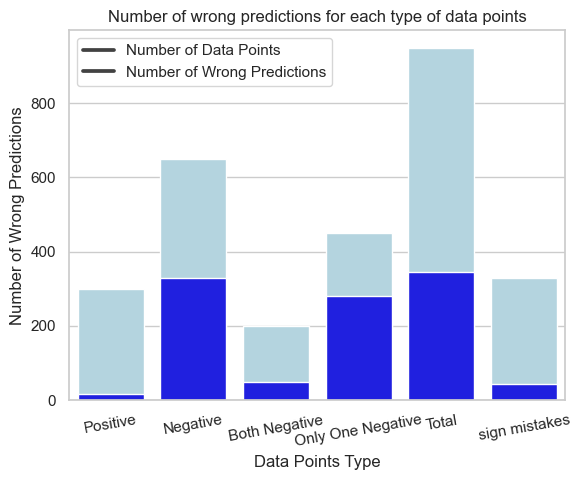

In [84]:
#create a bar plot
#plot the number of wrong predictions for each type of data points
#show height of bar as number of number of data points and number of wrong predictions as highlighted part of the bar

#plot the number of wrong predictions for each type of data points
fig, ax = plt.subplots()

#plot the number of data points
#use seaborn to plot the number of data points
sns.barplot(x='Data Points Type', y='Number of Data Points', data=df, ax=ax, color='lightblue')

#plot the number of wrong predictions
#use seaborn to plot the number of wrong predictions
sns.barplot(x='Data Points Type', y='Number of Wrong Predictions', data=df, ax=ax, color='blue')

#add legend
ax.legend(['Number of Data Points', 'Number of Wrong Predictions'])
#turn x labels vertically
plt.xticks(rotation=10)


#add title
ax.set_title('Number of wrong predictions for each type of data points')

#show plot
plt.show()




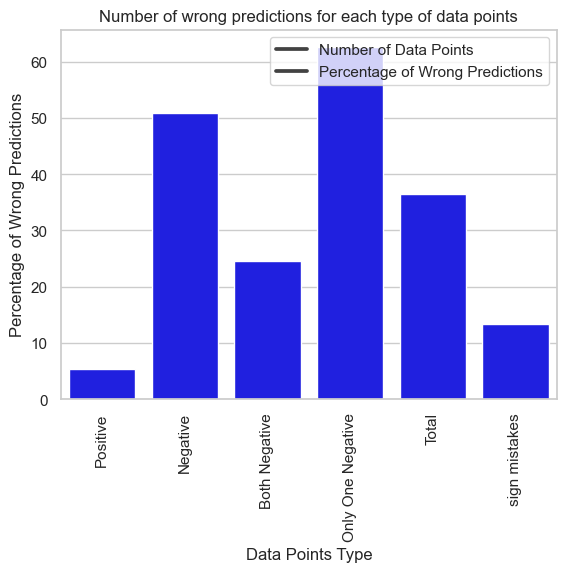

In [77]:
#convert above plot to percentage plot


# Calculate the percentage of wrong predictions
df['Percentage of Wrong Predictions'] = df['Number of Wrong Predictions'] / df['Number of Data Points'] * 100
#df['percentage of data points'] = df['Number of Data Points'] / len(data_points) * 100


fig, ax = plt.subplots()

#plot the number of data points
#use seaborn to plot the number of data points
#sns.barplot(x='Data Points Type', y='percentage of data points', data=df, ax=ax, color='lightblue')

#plot the number of wrong predictions
#use seaborn to plot the number of wrong predictions
sns.barplot(x='Data Points Type', y='Percentage of Wrong Predictions', data=df, ax=ax, color='blue')

#add legend
ax.legend(['Number of Data Points', 'Percentage of Wrong Predictions'])
#turn x labels vertically
plt.xticks(rotation=90)


#add title
ax.set_title('Number of wrong predictions for each type of data points')

#show plot
plt.show()


In [78]:
df

,Data Points Type,Number of Data Points,Number of Wrong Predictions,Percentage of Wrong Predictions
0,Positive,300,16,5.333333
1,Negative,649,330,50.847458
2,Both Negative,200,49,24.500000
3,Only One Negative,449,281,62.583519
4,Total,949,346,36.459431
5,sign mistakes,330,44,13.333333


In [80]:
#save the table to a csv file
#save df as excel file
# df.to_csv('wrong_predictions.csv', index=False)

#save df as excel file
df.to_excel('wrong_predictions.xlsx', index=False)


In [85]:
#do analysis vs  no of digits in the numbers

#use first number to calculate the number of digits

#convert first number to string
first_number = data_points[:, 0].astype(str)
#count the number of digits
first_number_digits = np.array([len(x) for x in first_number])

#seperate the data points based on number of digits in first number
#1 digit
one_digit_data_points = data_points[first_number_digits == 1]
one_digit_true_values = np.array(true_values)[first_number_digits == 1]
one_digit_predicted_values = np.array(predicted_values)[first_number_digits == 1]

#2 digits
two_digit_data_points = data_points[first_number_digits == 2]
two_digit_true_values = np.array(true_values)[first_number_digits == 2]
two_digit_predicted_values = np.array(predicted_values)[first_number_digits == 2]

#3 digits
three_digit_data_points = data_points[first_number_digits == 3]
three_digit_true_values = np.array(true_values)[first_number_digits == 3]
three_digit_predicted_values = np.array(predicted_values)[first_number_digits == 3]


#find the number of wrong predictions for each type of data points

#1 digit
#calculate the error
#count wrong predictions
wrong_predictions = 0
for i in range(len(one_digit_true_values)):
    if one_digit_true_values[i] != one_digit_predicted_values[i]:
        #print(f'Predicted: {one_digit_predicted_values[i]}, True: {one_digit_true_values[i]}')
        wrong_predictions += 1
one_digit_wrong_predictions = wrong_predictions
print(f'Number of wrong predictions: {wrong_predictions}/{len(one_digit_true_values)}')

#2 digits
#calculate the error
#count wrong predictions
wrong_predictions = 0

for i in range(len(two_digit_true_values)):
    if two_digit_true_values[i] != two_digit_predicted_values[i]:
        #print(f'Predicted: {two_digit_predicted_values[i]}, True: {two_digit_true_values[i]}')
        wrong_predictions += 1

two_digit_wrong_predictions = wrong_predictions

print(f'Number of wrong predictions: {wrong_predictions}/{len(two_digit_true_values)}')

#3 digits
#calculate the error
#count wrong predictions
wrong_predictions = 0
for i in range(len(three_digit_true_values)):
    if three_digit_true_values[i] != three_digit_predicted_values[i]:
        #print(f'Predicted: {three_digit_predicted_values[i]}, True: {three_digit_true_values[i]}')
        wrong_predictions += 1
three_digit_wrong_predictions = wrong_predictions

print(f'Number of wrong predictions: {wrong_predictions}/{len(three_digit_true_values)}')

Number of wrong predictions: 43/200
Number of wrong predictions: 157/400
Number of wrong predictions: 146/349


In [86]:
#convert above results to percentage
#1 digit
one_digit_percentage = one_digit_wrong_predictions / len(one_digit_true_values) * 100

#2 digits
two_digit_percentage = two_digit_wrong_predictions / len(two_digit_true_values) * 100

#3 digits
three_digit_percentage = three_digit_wrong_predictions / len(three_digit_true_values) * 100

#print the results
print(f'1 digit percentage: {one_digit_percentage}')
print(f'2 digit percentage: {two_digit_percentage}')
print(f'3 digit percentage: {three_digit_percentage}')


1 digit percentage: 21.5
2 digit percentage: 39.25
3 digit percentage: 41.833810888252145


In [87]:
#make a table of above results

#no of digits | number of data points | number of wrong predictions | percentage of wrong predictions

data = {'No of Digits': [1, 2, 3],
        'Number of Data Points': [len(one_digit_data_points), len(two_digit_data_points), len(three_digit_data_points)],
        'Number of Wrong Predictions': [one_digit_wrong_predictions, two_digit_wrong_predictions, three_digit_wrong_predictions],
        'Percentage of Wrong Predictions': [one_digit_percentage, two_digit_percentage, three_digit_percentage]}
df = pd.DataFrame(data)

df

,No of Digits,Number of Data Points,Number of Wrong Predictions,Percentage of Wrong Predictions
0,1,200,43,21.500000
1,2,400,157,39.250000
2,3,349,146,41.833811


In [88]:
#convert above table to excel file
df.to_excel('wrong_predictions_vs_no_of_digits.xlsx', index=False)



In [94]:
#when 1 st number is positive and 2nd number is negative
fst_positive_2nd_negative_data_points = data_points[(data_points[:, 0] > 0) & (data_points[:, 1] < 0)]
fst_positive_2nd_negative_true_values = np.array(true_values)[(data_points[:, 0] > 0) & (data_points[:, 1] < 0)]
fst_positive_2nd_negative_predicted_values = np.array(predicted_values)[(data_points[:, 0] > 0) & (data_points[:, 1] < 0)]

#calculate the error
#count wrong predictions
wrong_predictions = 0
count_positive = 0
wrong2 = 0
for i in range(len(fst_positive_2nd_negative_true_values)):
    if fst_positive_2nd_negative_true_values[i] != fst_positive_2nd_negative_predicted_values[i] and fst_positive_2nd_negative_true_values[i] > 0:
        #print(f'Predicted: {fst_positive_2nd_negative_predicted_values[i]}, True: {fst_positive_2nd_negative_true_values[i]}')
        wrong_predictions += 1

    if fst_positive_2nd_negative_true_values[i] > 0:
        count_positive += 1

    if fst_positive_2nd_negative_true_values[i] != fst_positive_2nd_negative_predicted_values[i]:
    
        wrong2+=1


fst_positive_2nd_negative_wrong_predictions = wrong_predictions

print(f'Number of wrong predictions when 1st positive 2 nd negative and true val postive: {wrong_predictions}/{count_positive}')
#print(f'Number of wrong predictions when 1st positive 2 nd negative: {wrong_predictions}/{len(fst_positive_2nd_negative_true_values)}')
print(f'Number of total wrong when 1st positive 2 nd negative : {wrong2}/{len(fst_positive_2nd_negative_true_values)}')

Number of wrong predictions when 1st positive 2 nd negative and true val postive: 16/112
Number of total wrong when 1st positive 2 nd negative : 128/250


In [96]:
fst_negative_2nd_positive_data_points = data_points[(data_points[:, 0] < 0) & (data_points[:, 1] > 0)]
fst_negative_2nd_positive_true_values = np.array(true_values)[(data_points[:, 0] < 0) & (data_points[:, 1] > 0)]
fst_negative_2nd_positive_predicted_values = np.array(predicted_values)[(data_points[:, 0] < 0) & (data_points[:, 1] > 0)]

#calculate the error
#count wrong predictions
wrong_predictions = 0
count_negative = 0
wrong2 = 0

for i in range(len(fst_negative_2nd_positive_true_values)):
    if fst_negative_2nd_positive_true_values[i] != fst_negative_2nd_positive_predicted_values[i] and fst_negative_2nd_positive_true_values[i] < 0:
        #print(f'Predicted: {fst_negative_2nd_positive_predicted_values[i]}, True: {fst_negative_2nd_positive_true_values[i]}')
        wrong_predictions += 1

    if fst_negative_2nd_positive_true_values[i] < 0:
        count_negative += 1

    if fst_negative_2nd_positive_true_values[i] != fst_negative_2nd_positive_predicted_values[i]:
    
        wrong2+=1

fst_negative_2nd_positive_wrong_predictions = wrong_predictions

print(f'Number of wrong predictions when 1st negative 2 nd positive and true val negative: {wrong_predictions}/{count_negative}')
#print(f'Number of wrong predictions when 1st negative 2 nd positive: {wrong_predictions}/{len(fst_negative_2nd_positive_true_values)}')
print(f'Number of total wrong when 1st negative 2 nd positive : {wrong2}/{len(fst_negative_2nd_positive_true_values)}')


Number of wrong predictions when 1st negative 2 nd positive and true val negative: 74/90
Number of total wrong when 1st negative 2 nd positive : 153/199
